# **Capstone UAS Bengkel Koding (Data Science - DS01)**
Nama : Anggita Alya Salsabila <br>
NIM  : A11.2022.14401 <br>
Link : https://colab.research.google.com/drive/1TchyjJU_-3nqpP_mcvTyCfd2eltM2CnV?usp=sharing

##**1. Exploratory Data Analysis (EDA)**

In [2]:
#import Library
import pandas as pd # Untuk melakukan manipulasi,analisis, dan visualisasi data
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Lybrary yang dibangun di atas Matplotlib
import numpy as np # untuk operasi numerik

In [42]:
#Menghubungkan Gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Untuk membaca dataset yang ada di Gdrive
df = pd.read_csv('/content/drive/MyDrive/Bengkod/Project UAS/ObesityDataSet.csv')

In [44]:
# Menampilkan 10 dataset
print("Menampilkan beberapa baris pertama:")
df.head(10)

Menampilkan beberapa baris pertama:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,29,Male,1.62,53,Sometimes,yes,2,3,no,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,23,Female,1.5,55,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Motorbike,Normal_Weight
7,22,Male,1.64,53,Sometimes,no,2,3,no,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,24,Male,1.78,348.49777557852735,Frequently,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight
9,22,Male,1.72,68,no,yes,2,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight


In [45]:
# Menampilkan Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2111, 17)


In [46]:
# Menampilkan informasi dataset
print("Menampilkan Informasi dataset:")
df.info()

Menampilkan Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF              

In [47]:
#Statistik deskripsi dataset
print("Manampilkan Deskripsi dataset:")
df.describe(include='all')

Manampilkan Deskripsi dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


1. Tipe data belum sesuai: Semua kolom masih bertipe object, termasuk kolom yang seharusnya angka seperti Age, Height, dan Weight. Data perlu diubah ke bentuk numerik atau kategorikal sesuai isinya.

2. Ada data yang kosong (missing value): Beberapa kolom masih memiliki nilai kosong, ?, dll.

3. Nilai unik belum rapi: Contohnya, kolom Gender memiliki 3 nilai unik, padahal seharusnya hanya 2 (pria dan wanita).

In [48]:
# Cek Missing Values
print("Missing Values per Kolom:")
df.isnull().sum()

Missing Values per Kolom:


,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


Berdasarkan hasil analisis, ditemukan bahwa beberapa kolom masih memiliki data yang kosong (missing values) dan nilai unique.

In [49]:
# Menampilkan Baris yang Mengandung Nilai Kosong
df[df.isnull().any(axis=1)]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
33,39,Male,1.79,NaN,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
64,21,Female,1.66,NaN,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
67,23,Male,1.65,95,Frequently,yes,2,NaN,no,no,2,yes,0,1,Always,Automobile,Obesity_Type_I
69,23,Male,1.8,60,Sometimes,no,NaN,3,no,no,3,yes,0,1,no,Public_Transportation,Normal_Weight
73,19,Male,1.85,65,Sometimes,no,NaN,3,no,no,3,yes,2,1,Sometimes,Bike,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,25.895546,Female,1.626179,110.074019,Sometimes,yes,3,3,NaN,no,1.967707,yes,0.01437,0.434073,Sometimes,Public_Transportation,Obesity_Type_III
2048,18.634286,Female,1.669354,126.088301,Sometimes,yes,3,NaN,no,no,1.144539,yes,0.922014,0.899673,Sometimes,Public_Transportation,Obesity_Type_III
2067,23.647935,Female,1.681394,114.479459,Sometimes,yes,3,3,NaN,no,2.435978,yes,0.232742,0.692608,Sometimes,Public_Transportation,Obesity_Type_III
2080,NaN,Female,1.741925,133.017105,Sometimes,yes,3,3,no,no,2.474518,yes,1.560261,0.662489,Sometimes,Public_Transportation,Obesity_Type_III


Dari hasil diatas terdeteksi ada bebrapa baris yang mengandung nilai kosong dan itu terdeteksi sebagai NaN.

In [50]:
# Mengecek data duplikat
df.duplicated().sum()

np.int64(18)

In [51]:
# Menampilkan Jumlah dan Daftar Nilai Unik per Kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Jumlah nilai unik:", df[col].nunique())
    print("Daftar nilai unik:", df[col].unique())


Kolom: Age
Jumlah nilai unik: 1394
Daftar nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 3
Daftar nilai unik: ['Female' 'Male' '?' nan]

Kolom: Height
Jumlah nilai unik: 1562
Daftar nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1518
Daftar nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: CALC
Jumlah nilai unik: 5
Daftar nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom: FAVC
Jumlah nilai unik: 3
Daftar nilai unik: ['no' 'yes' '?' nan]

Kolom: FCVC
Jumlah nilai unik: 808
Daftar nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448

In [52]:
# Mengganti '', ' ', '?' menjadi NaN
df.replace(['', ' ', '?'], np.nan, inplace=True)

In [53]:
# Menampilkan Jumlah dan Daftar Nilai Unik per Kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Jumlah nilai unik:", df[col].nunique())
    print("Daftar nilai unik:", df[col].unique())


Kolom: Age
Jumlah nilai unik: 1393
Daftar nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 2
Daftar nilai unik: ['Female' 'Male' nan]

Kolom: Height
Jumlah nilai unik: 1561
Daftar nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1517
Daftar nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: CALC
Jumlah nilai unik: 4
Daftar nilai unik: ['no' 'Sometimes' 'Frequently' nan 'Always']

Kolom: FAVC
Jumlah nilai unik: 2
Daftar nilai unik: ['no' 'yes' nan]

Kolom: FCVC
Jumlah nilai unik: 807
Daftar nilai unik: ['2' '3' '1' nan '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2

Value '', ' ', '?' sudah diubah kebentuk NaN

In [54]:
# List semua kolom numeric yang mau dicek
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


Kolom: Age
Age
18           124
26            99
21            96
23            89
19            59
            ... 
31.426573      1
34.369686      1
33.690239      1
37.496175      1
18.701766      1
Name: count, Length: 1393, dtype: int64

Kolom: Height
Height
1.7         58
1.65        50
1.6         41
1.75        39
1.62        36
            ..
1.699474     1
1.621048     1
1.560029     1
1.835678     1
1.701397     1
Name: count, Length: 1561, dtype: int64

Kolom: Weight
Weight
80           58
50           42
70           41
75           39
60           36
             ..
97.92035      1
88.431954     1
86.963628     1
84.315608     1
89.802492     1
Name: count, Length: 1517, dtype: int64

Kolom: FCVC
FCVC
3           647
2           592
1            33
2.442536      2
2.823179      2
           ... 
2.010684      1
2.300408      1
2.119643      1
2.901924      1
2.749629      1
Name: count, Length: 807, dtype: int64

Kolom: NCP
NCP
3           1183
1            196
4        

In [55]:
# Fitur kategorikal dan biner sesuai dengan nama kolom yang asli (sebelah kiri)
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
                    'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# Mengubah tipe data untuk kolom-kolom kategori menjadi 'category'
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Cek tipe data kolom-kolom setelah perubahan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2089 non-null   object  
 1   Gender                          2089 non-null   category
 2   Height                          2089 non-null   object  
 3   Weight                          2092 non-null   object  
 4   CALC                            2091 non-null   category
 5   FAVC                            2089 non-null   category
 6   FCVC                            2093 non-null   category
 7   NCP                             2089 non-null   category
 8   SCC                             2093 non-null   category
 9   SMOKE                           2098 non-null   category
 10  CH2O                            2096 non-null   category
 11  family_history_with_overweight  2088 non-null   category
 12  FAF                 

In [56]:
# Fitur integer
integer_cols = ['FCVC', 'TUE', 'NCP', 'CH2O', 'FAF']

for col in integer_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')  # Mengubah menjadi integer

# Fitur kontinu
continuous_cols = ['Age', 'Height', 'Weight']

# Age → round ke integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').round().astype('Int64')

# Height → 2 desimal
df['Height'] = pd.to_numeric(df['Height'], errors='coerce').round(2)

# Weight → 1 desimal
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce').round(1)

In [57]:
# Menampilkan Informasi umum dataset setelah type data nya diganti
df.info()

# Deskripsi statistik data numerik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2089 non-null   Int64   
 1   Gender                          2089 non-null   category
 2   Height                          2089 non-null   float64 
 3   Weight                          2092 non-null   float64 
 4   CALC                            2091 non-null   category
 5   FAVC                            2089 non-null   category
 6   FCVC                            2093 non-null   Int64   
 7   NCP                             2089 non-null   Int64   
 8   SCC                             2093 non-null   category
 9   SMOKE                           2098 non-null   category
 10  CH2O                            2096 non-null   Int64   
 11  family_history_with_overweight  2088 non-null   category
 12  FAF                 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.0,2089.000000,2092.000000,2093.0,2089.0,2096.0,2092.0,2096.0
mean,24.72044,1.706573,88.608174,2.449116,2.732408,2.036737,1.071224,0.686546
std,8.399528,0.117753,36.154784,0.685074,1.003207,0.800409,1.187047,0.775847
min,14.0,1.450000,39.000000,1.0,1.0,1.0,0.0,0.0
25%,20.0,1.630000,66.000000,2.0,3.0,2.0,0.0,0.0
50%,23.0,1.700000,83.000000,2.0,3.0,2.0,1.0,1.0
75%,26.0,1.770000,108.025000,3.0,3.0,2.0,2.0,1.0
max,106.0,2.850000,441.100000,9.0,12.0,9.0,12.0,8.0


In [58]:
# List semua kolom numeric yang akan dicek setelah dibulatkan
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print("Jumlah nilai unik:", df[col].nunique())
    print(df[col].value_counts())


Kolom: Age
Jumlah nilai unik: 52
Age
21     235
23     214
26     208
18     207
19     169
22     160
20     148
24      95
25      81
17      69
31      60
30      51
27      41
33      35
38      34
29      31
34      29
32      25
37      24
39      24
28      20
41      20
35      19
16      19
40      19
36       6
42       6
44       6
55       5
45       3
43       3
46       2
51       2
88       1
52       1
61       1
56       1
94       1
15       1
14       1
89       1
97       1
99       1
103      1
105      1
48       1
47       1
106      1
91       1
92       1
96       1
101      1
Name: count, dtype: Int64

Kolom: Height
Jumlah nilai unik: 61
Height
1.70    122
1.75    120
1.62     94
1.76     93
1.65     87
       ... 
2.70      1
1.95      1
1.94      1
2.63      1
2.85      1
Name: count, Length: 61, dtype: int64

Kolom: Weight
Jumlah nilai unik: 697
Weight
80.0     62
50.0     44
70.0     42
75.0     40
60.0     37
         ..
41.4      1
49.5      1
81.4     

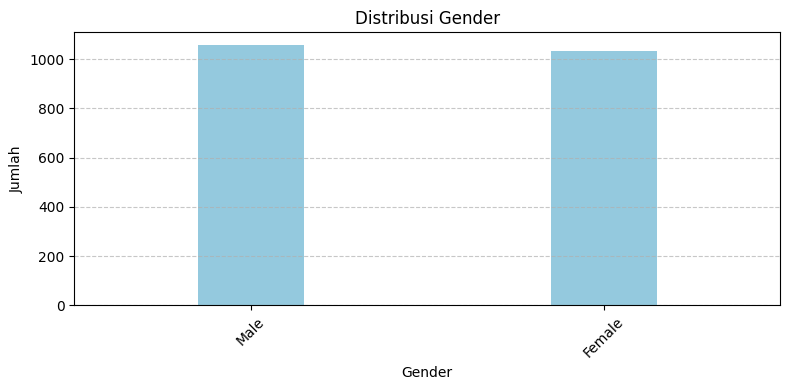

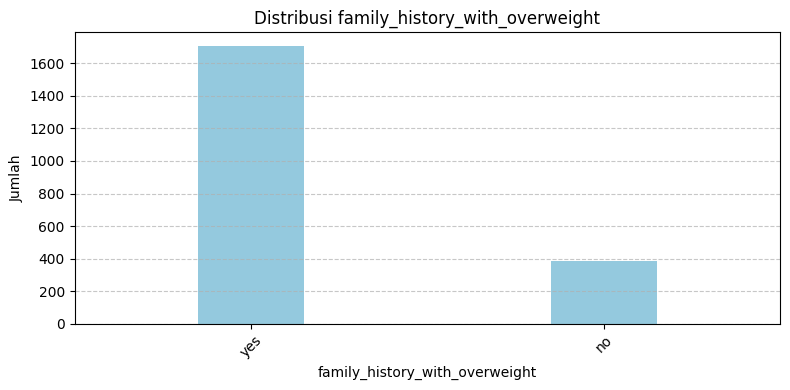

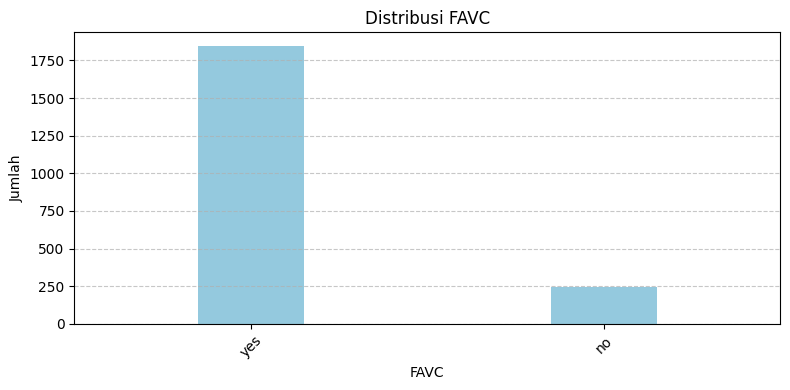

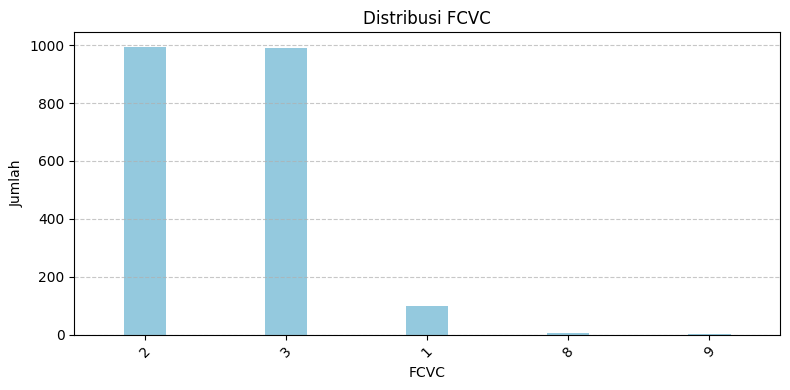

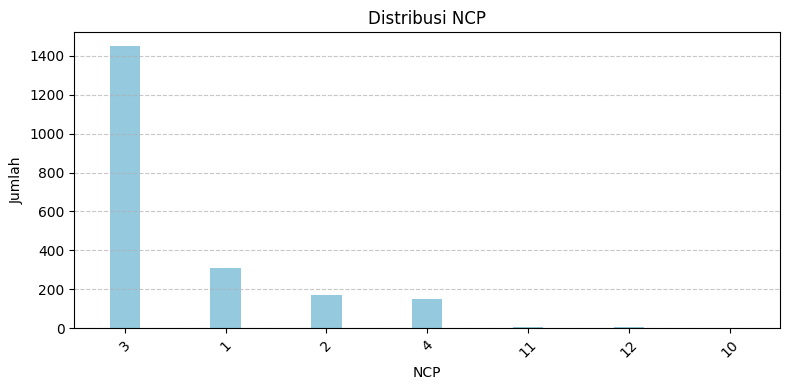

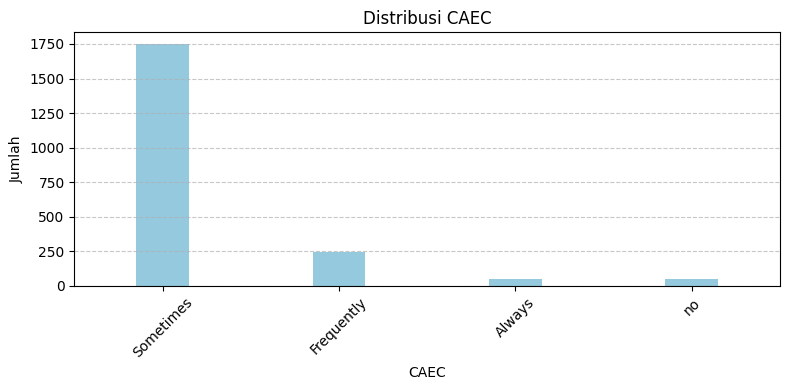

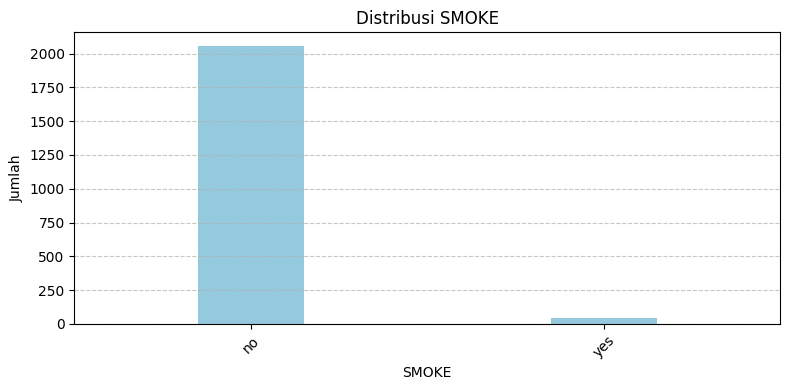

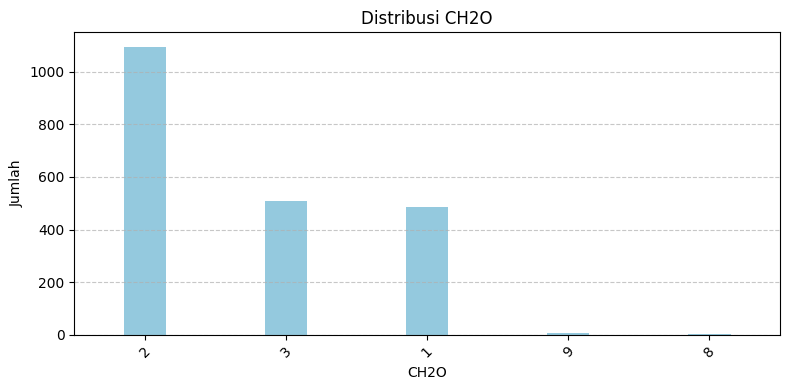

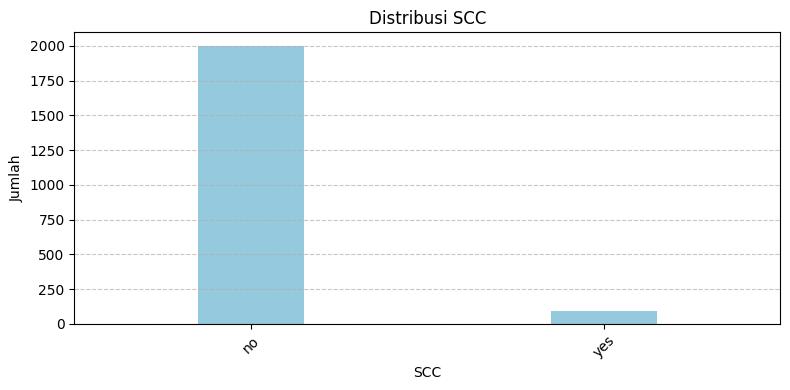

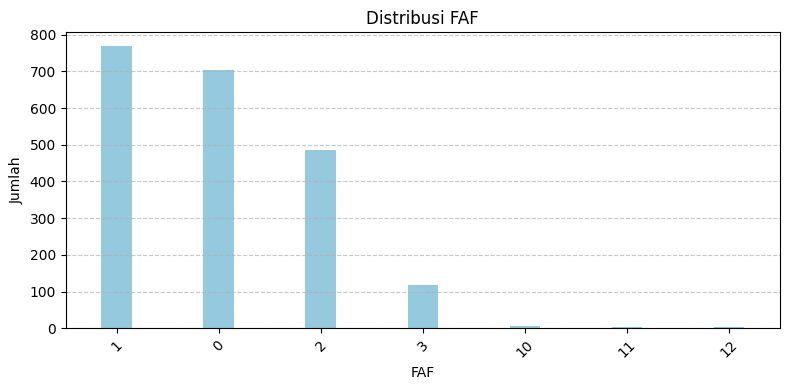

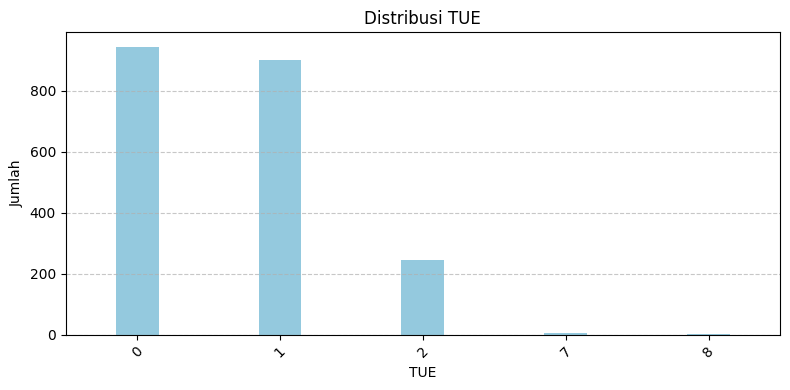

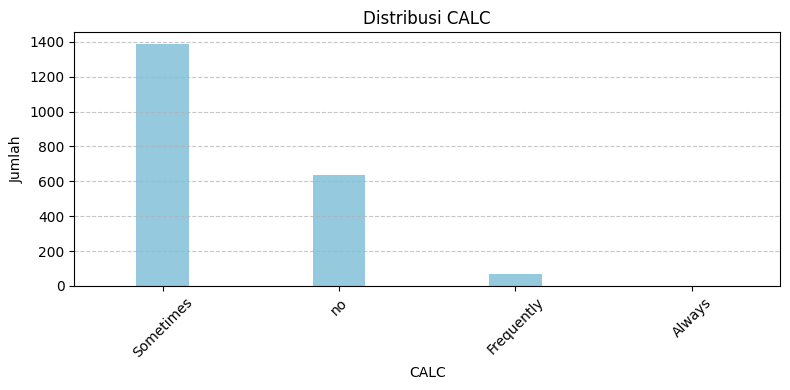

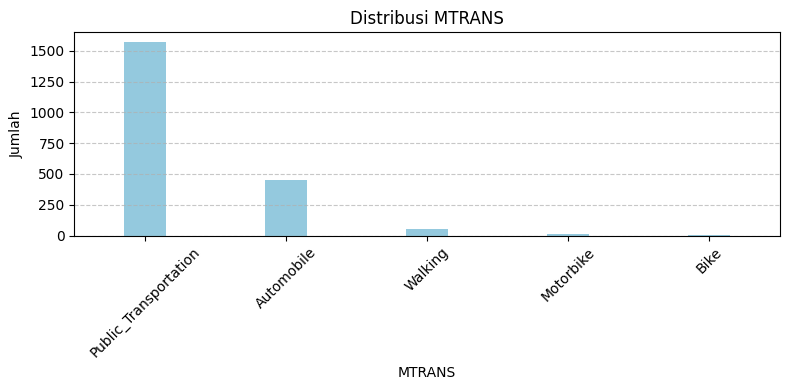

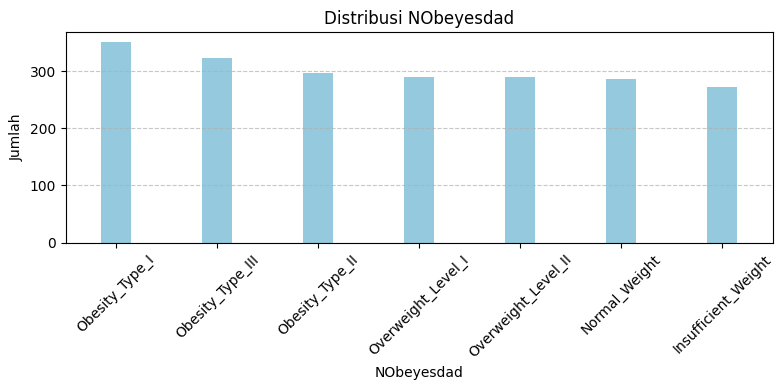

In [59]:
# Daftar fitur kategori
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
                    'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# Plot bar untuk setiap fitur kategori
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue', width=0.3)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

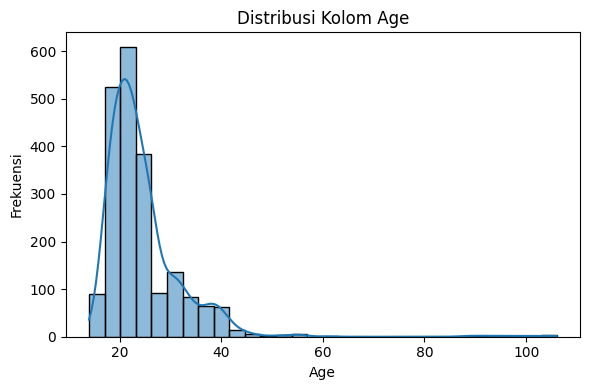

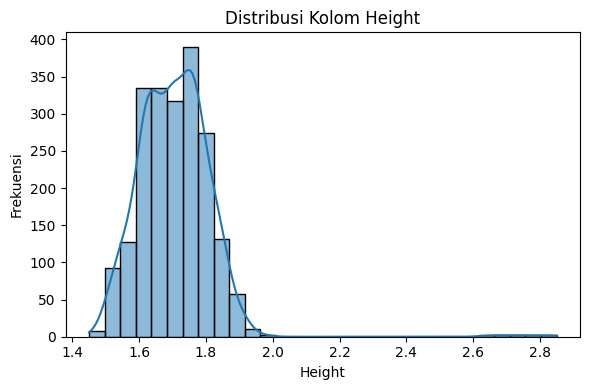

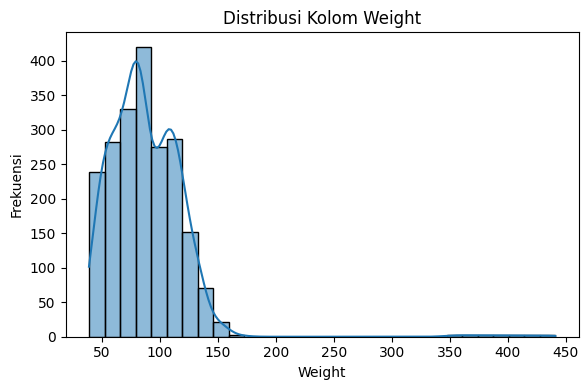

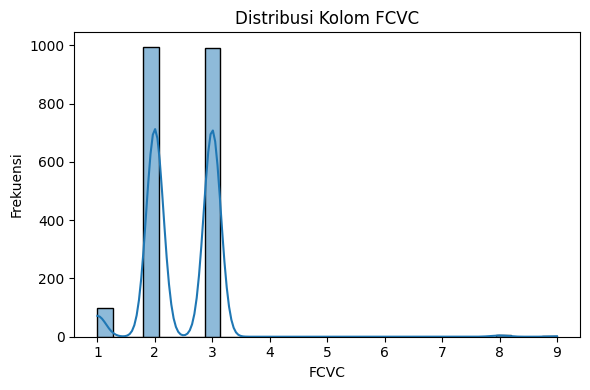

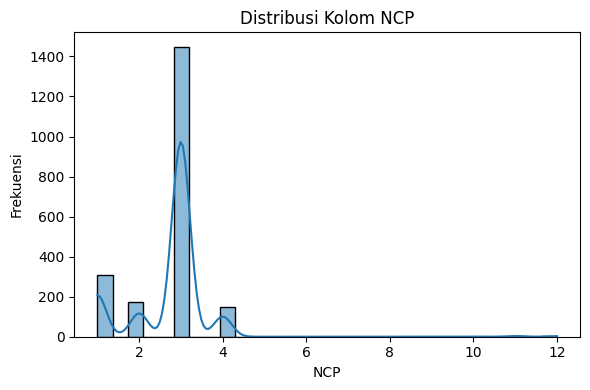

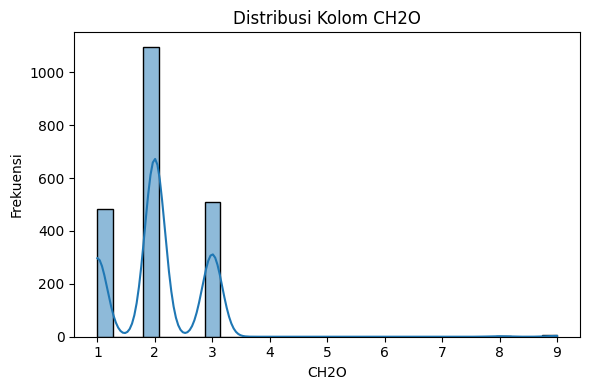

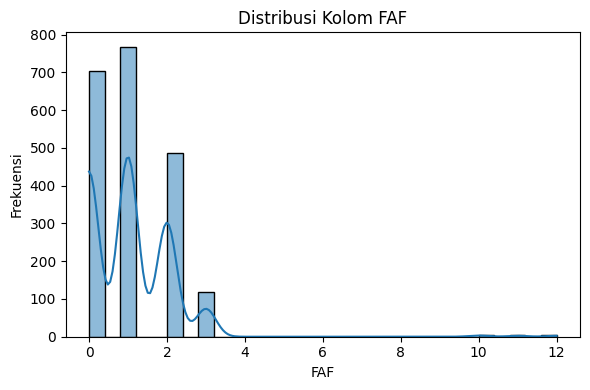

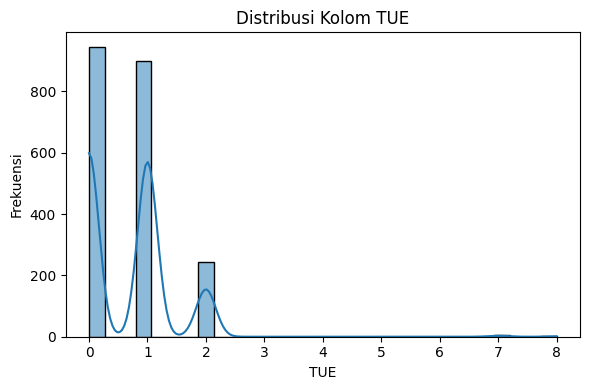

In [60]:
# Daftar kolom numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Histogram untuk tiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Kolom {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

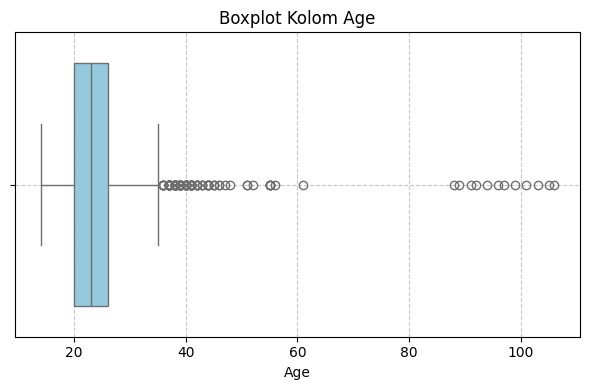

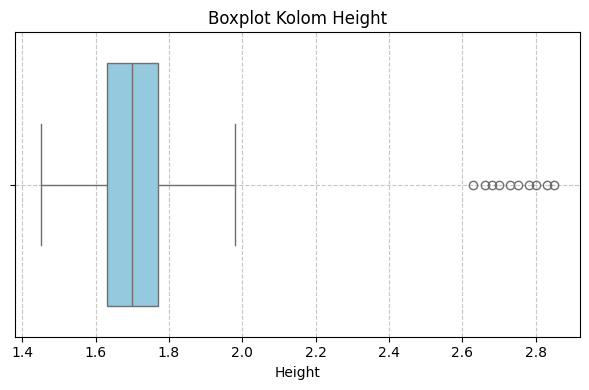

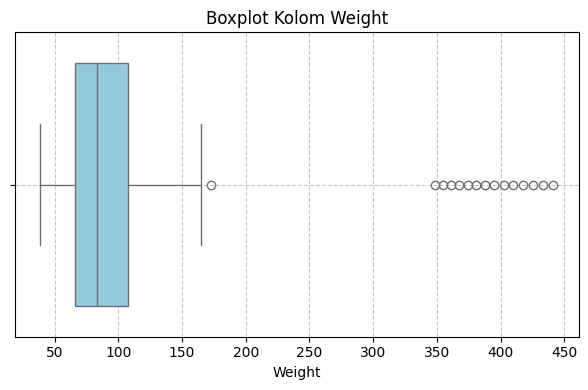

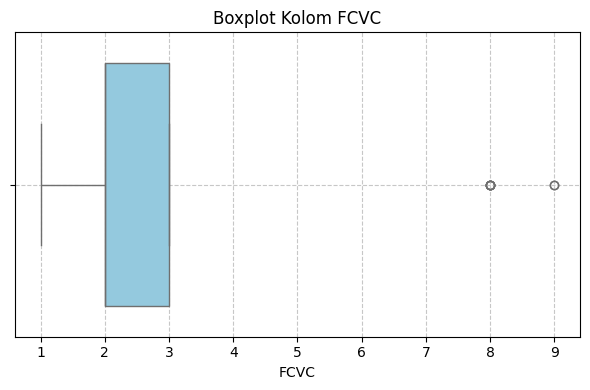

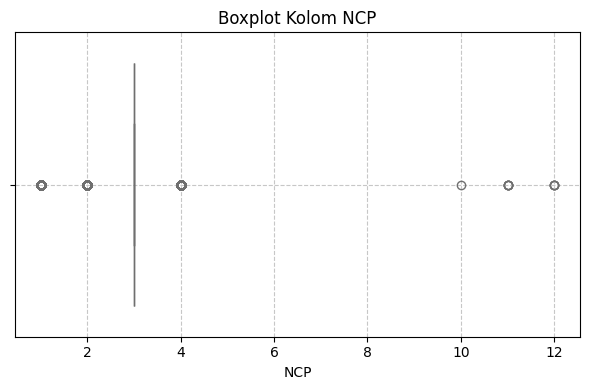

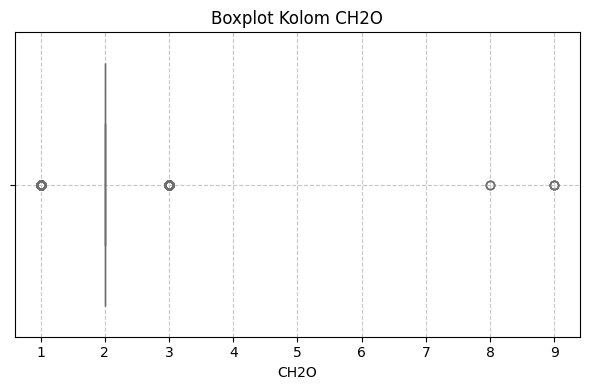

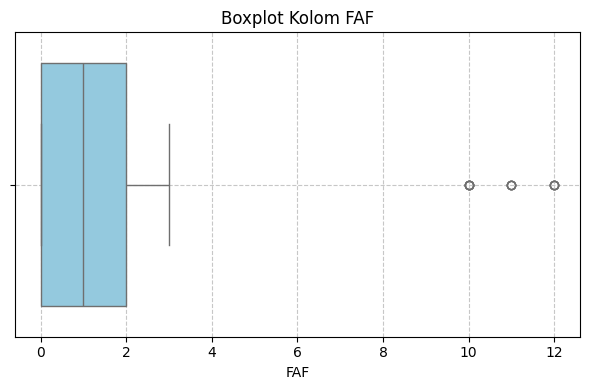

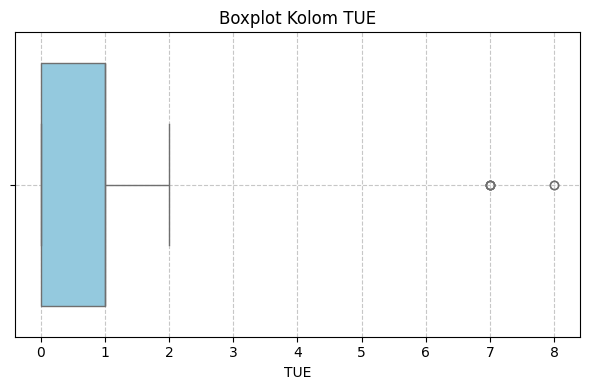

In [61]:
# Daftar kolom numerik (pastikan sudah didefinisikan sebelumnya)
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Menampilkan boxplot untuk setiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(6, 4))  # Ukuran figure
    sns.boxplot(x=df[col], color='skyblue')  # Warna bisa diganti sesuai selera
    plt.title(f'Boxplot Kolom {col}')  # Judul boxplot
    plt.xlabel(col)  # Label sumbu x
    plt.grid(True, linestyle='--', alpha=0.7)  # Tambahkan grid agar lebih rapi
    plt.tight_layout()  # Menghindari pemotongan label
    plt.show()

Distribusi Kelas Target (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Persentase Tiap Kelas:
NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64


<ipython-input-62-fa75f7dd750f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis')


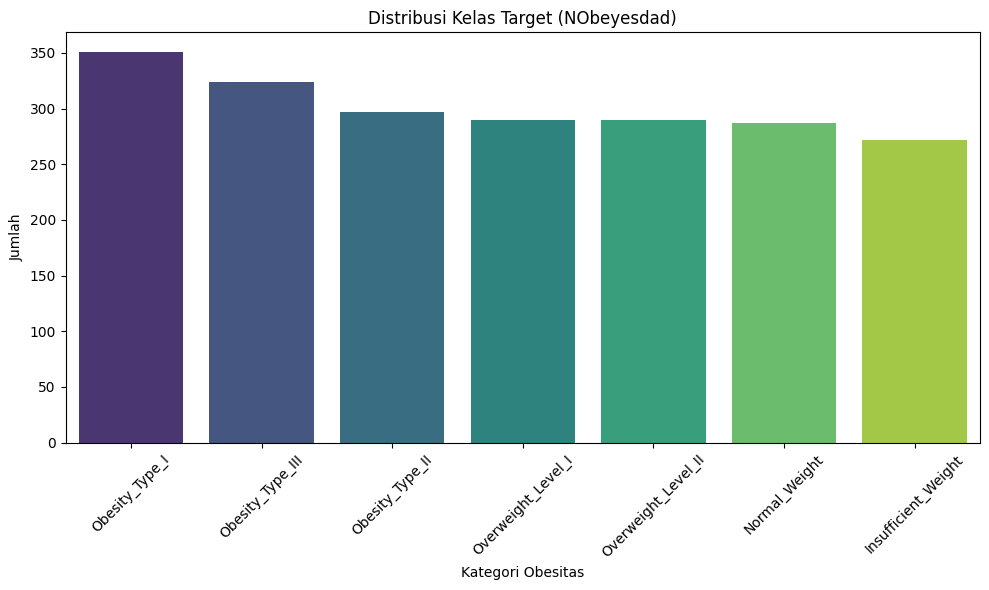

In [62]:
# Menampilkan distribusi kelas target secara numerik
print("Distribusi Kelas Target (NObeyesdad):")
print(df['NObeyesdad'].value_counts())
print("\nPersentase Tiap Kelas:")
print(df['NObeyesdad'].value_counts(normalize=True) * 100)

# Visualisasi distribusi target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis')
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###**Kesimpulan dari hasil EDA (Exploratory Data Analysis)**
- Tipe Data dan Missing Value: Setelah dilakukan pengecekan menggunakan nilai unik dan inspeksi manual, ditemukan adanya nilai kosong (missing values) seperti '?', '', dan ' '. Terdapat 18 data duplikat. Tipe data awal sebagian besar berupa object, dan telah diubah ke tipe data yang sesuai (category, int, float) untuk memudahkan analisis lebih lanjut.

- Distribusi Fitur Numerik: Fitur seperti Age, Height, dan Weight menunjukkan distribusi yang relatif normal, namun juga ditemukan indikasi outlier pada beberapa fitur melalui visualisasi boxplot.

- Presisi Nilai Numerik: Beberapa fitur numerik memiliki presisi yang terlalu tinggi (banyak angka di belakang koma). Oleh karena itu, telah dilakukan pembulatan ke bilangan bulat atau desimal terbatas untuk meningkatkan keterbacaan dan keakuratan analisis.

- Inkonsistensi pada Fitur Kategorikal: Beberapa fitur kategorikal memiliki nilai yang tidak konsisten. Hal ini telah diatasi dengan pembersihan dan standarisasi nilai unik agar tidak terjadi bias dalam pemodelan.

- Distribusi Target (NObeyesdad): Hasil visualisasi menunjukkan bahwa kolom target memiliki ketidakseimbangan kelas (class imbalance). Beberapa kategori seperti Obesity_Type_III jauh lebih sedikit dibanding Normal_Weight atau Overweight_Level_I. Perlu dipertimbangkan metode penanganan ketidakseimbangan data seperti oversampling, undersampling, atau SMOTE pada tahap modeling.

##**2. Preprocessing Data**

Penanganan terhadap missing value dan outlier.

In [63]:
# Cek ulang missing values
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


Setelah diganti, terdapat beberapa missing value:
1. Age	22
2. Gender	22
3. Height	22
4. Weight	19
5. CALC	20
6. FAVC	22
7. FCVC	18
8. NCP	22
9. SCC	18
10. SMOKE	13
11. CH2O	15
12. family_history_with_overweight	23
13. FAF	19
14. TUE	15
15. CAEC	18
16. MTRANS	12


Dari total 2111 record, dengan jumlah missing value yang relatif sedikit, saya memutuskan untuk menghapus record yang memiliki missing value. Meskipun pilihan ini berpotensi memengaruhi tingkat akurasi model.

In [64]:
# Hapus data yang missing value
df.dropna(inplace=True)
print(df)

      Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  \
0      21  Female    1.62    64.0          no   no     2    3   no    no   
1      21  Female    1.52    56.0   Sometimes   no     3    3  yes   yes   
2      23    Male    1.80    77.0  Frequently   no     2    3   no    no   
3      27    Male    1.80    87.0  Frequently   no     3    3   no    no   
4      22    Male    1.78    89.8   Sometimes   no     2    1   no    no   
...   ...     ...     ...     ...         ...  ...   ...  ...  ...   ...   
2106   21  Female    1.71   131.4   Sometimes  yes     3    3   no    no   
2107   22  Female    1.75   133.7   Sometimes  yes     3    3   no    no   
2108   23  Female    1.75   133.7   Sometimes  yes     3    3   no    no   
2109   24  Female    1.74   133.3   Sometimes  yes     3    3   no    no   
2110   24  Female    1.74   133.5   Sometimes  yes     3    3   no    no   

      CH2O family_history_with_overweight  FAF  TUE       CAEC  \
0        2           

Saya melakukan reset index
- Jika Index tidak digunakan secara eksplisit → Tidak perlu reset index.  
- Jika Index digunakan untuk pemrosesan data → Sebaiknya reset index untuk menghindari error.

In [65]:
# Reset index setelah menghapus data
df.reset_index(drop=True, inplace=True)

# Cek informasi data setelah pembersihan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             1811 non-null   Int64   
 1   Gender                          1811 non-null   category
 2   Height                          1811 non-null   float64 
 3   Weight                          1811 non-null   float64 
 4   CALC                            1811 non-null   category
 5   FAVC                            1811 non-null   category
 6   FCVC                            1811 non-null   Int64   
 7   NCP                             1811 non-null   Int64   
 8   SCC                             1811 non-null   category
 9   SMOKE                           1811 non-null   category
 10  CH2O                            1811 non-null   Int64   
 11  family_history_with_overweight  1811 non-null   category
 12  FAF                 

**Mendeteksi jumlah outlier menggunakan IQR**

In [66]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung IQR hanya untuk kolom numerik
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = (df_numeric < batas_bawah) | (df_numeric > batas_atas)

# Hitung jumlah outlier per kolom
jumlah_outlier = outliers.sum()

# Tampilkan hasil
print("Jumlah outlier per kolom sebelum penggantian:")
print(jumlah_outlier)

Jumlah outlier per kolom sebelum penggantian:
Age       154
Height     10
Weight     15
FCVC        8
NCP       554
CH2O      872
FAF        13
TUE         7
dtype: Int64


Terdapat outlier pada beberapa fitur dengan nilai bertype numerik
```
Jumlah outlier per kolom sebelum penggantian:
Age       154
Height     10
Weight     15
FCVC        8
NCP       554
CH2O      872
FAF        13
TUE         7
dtype: Int64
```
Percobaan penanganan outlier dilakukan dengan mengganti nilai outlier menggunakan "median" atau nilai tengah dari distribusi data.

Jumlah outlier per kolom setelah penggantian:
Age       65
Height     0
Weight     0
FCVC       0
NCP        0
CH2O       0
FAF        0
TUE        0
dtype: Int64


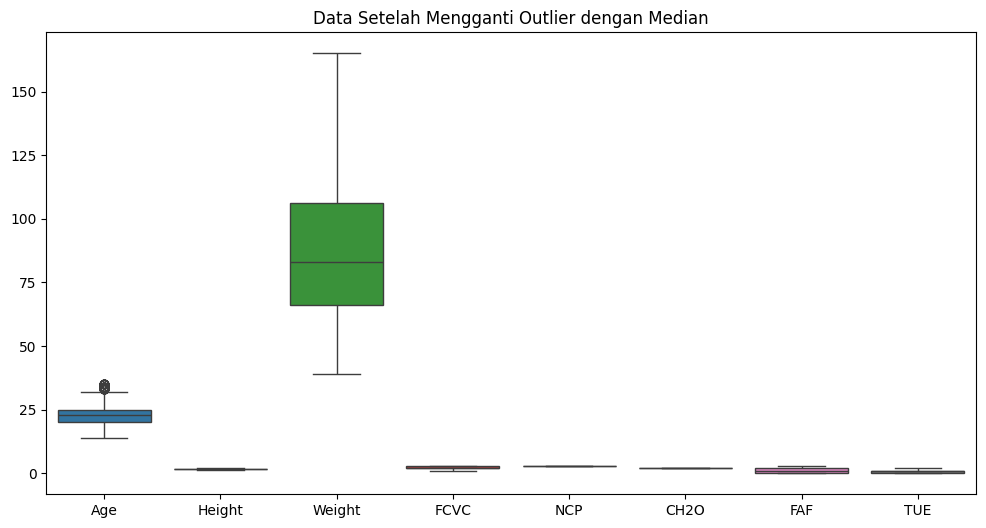

In [67]:
# Salin dataset agar perubahan tidak merusak data asli
df_cleaned = df.copy()

# Pilih hanya kolom numerik
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Hitung IQR hanya untuk kolom numerik
Q1 = df_numeric.quantile(0.25)  # Kuartil 1
Q3 = df_numeric.quantile(0.75)  # Kuartil 3
IQR = Q3 - Q1  # Rentang Interkuartil

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR  # Batas Bawah
batas_atas = Q3 + 1.5 * IQR  # Batas Atas

# Fungsi untuk mengganti outlier dengan median
def replace_outliers_with_median(df, column):
    median_value = df[column].median()
    df.loc[(df[column] < batas_bawah[column]) | (df[column] > batas_atas[column]), column] = median_value

# Terapkan fungsi untuk mengganti outlier di kolom numerik
for col in df_numeric.columns:
    replace_outliers_with_median(df_cleaned, col)

# Pilih ulang hanya kolom numerik untuk perhitungan setelah penggantian
df_numeric_cleaned = df_cleaned.select_dtypes(include=['number'])

# Hitung ulang IQR setelah penggantian hanya untuk kolom numerik
Q1_after = df_numeric_cleaned.quantile(0.25)
Q3_after = df_numeric_cleaned.quantile(0.75)
IQR_after = Q3_after - Q1_after

batas_bawah_after = Q1_after - 1.5 * IQR_after
batas_atas_after = Q3_after + 1.5 * IQR_after

# Hitung jumlah outlier setelah penggantian
outliers_after = (df_numeric_cleaned < batas_bawah_after) | (df_numeric_cleaned > batas_atas_after)
jumlah_outlier_sesudah = outliers_after.sum()

# Tampilkan jumlah outlier setelah penggantian
print("Jumlah outlier per kolom setelah penggantian:")
print(jumlah_outlier_sesudah)

# Visualisasi data setelah mengganti outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric_cleaned)
plt.title("Data Setelah Mengganti Outlier dengan Median")
plt.show()

Setelah dilakukan penanganan fitur seperti 'Height', 'Weight', 'FCVC',     'NCP', 'CH2O', 'FAF', 'TUE' berhasil diatasi.
```
Jumlah outlier per kolom setelah penggantian:
Age       65
Height     0
Weight     0
FCVC       0
NCP        0
CH2O       0
FAF        0
TUE        0
dtype: Int64
```
Tetapi fitur 'Age' masih terdapat outlier.
Setelahnya dilakukan penghapusan record dengan nilai outliernya.


In [68]:
print(f"Jumlah data sebelum penghapusan outlier Age: {df_cleaned.shape[0]}")

# Deteksi outlier Age
outliers_age = detect_outliers_iqr(df_cleaned, 'Age')

Jumlah data sebelum penghapusan outlier Age: 1811


In [69]:
# Fungsi deteksi outlier IQR untuk kolom 'Age'
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Deteksi outlier Age
outliers_age = detect_outliers_iqr(df_cleaned, 'Age')

# Hapus baris yang mengandung outlier Age
df_cleaned = df_cleaned.drop(outliers_age.index)

print(f"Jumlah data setelah penghapusan outlier Age: {df_cleaned.shape[0]}")

Jumlah data setelah penghapusan outlier Age: 1746


In [70]:
# Reset index setelah menghapus data
df.reset_index(drop=True, inplace=True)

# Cek informasi data setelah pembersihan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             1811 non-null   Int64   
 1   Gender                          1811 non-null   category
 2   Height                          1811 non-null   float64 
 3   Weight                          1811 non-null   float64 
 4   CALC                            1811 non-null   category
 5   FAVC                            1811 non-null   category
 6   FCVC                            1811 non-null   Int64   
 7   NCP                             1811 non-null   Int64   
 8   SCC                             1811 non-null   category
 9   SMOKE                           1811 non-null   category
 10  CH2O                            1811 non-null   Int64   
 11  family_history_with_overweight  1811 non-null   category
 12  FAF                 

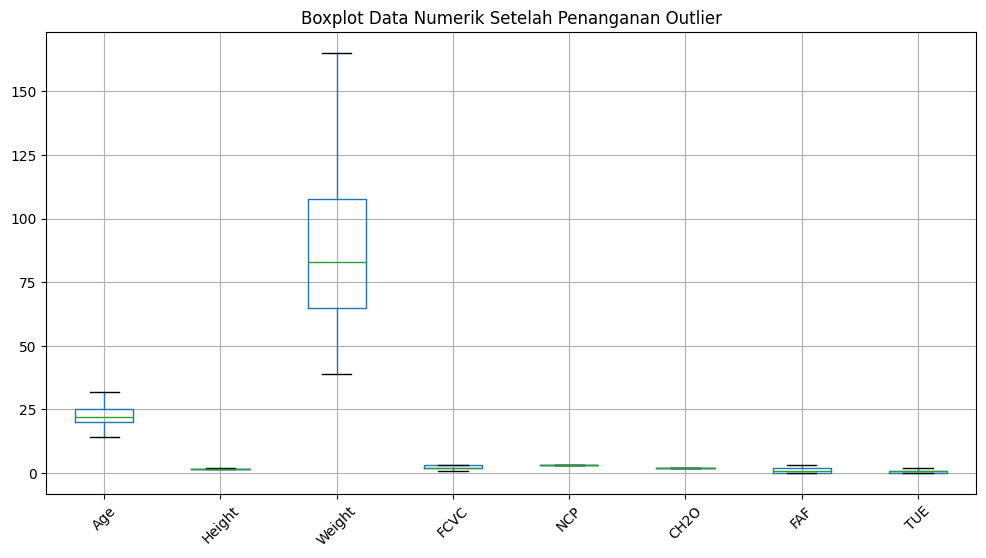

In [72]:
# Visualisasi setelah menangani outlier
plt.figure(figsize=(12, 6))
df_cleaned.select_dtypes(include=['number']).boxplot(rot=45)
plt.title("Boxplot Data Numerik Setelah Penanganan Outlier")
plt.show()

In [74]:
# Pilih kolom numerik dari data yang sudah diolah
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# Deteksi outlier menggunakan metode IQR
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tandai outlier
outliers = (df_cleaned[numerical_cols] < lower_bound) | (df_cleaned[numerical_cols] > upper_bound)

# Hitung jumlah outlier per kolom
print("Jumlah outlier per kolom setelah penanganan:\n", outliers.sum())

Jumlah outlier per kolom setelah penanganan:
 Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: Int64


- Jumlah data setelah menghapus outlier Age: 1746
- Penangan nilai Missing Value dan Outlier berhasil dilakukan. <br>
Setelahnya saya melakukan penghapusan data duplikat.

In [75]:
# Mengecek jumlah data duplikat sebelum dihapus
jumlah_duplikat = df_cleaned.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 102


- Ternyata masih ditemukan data yang duplikat <br>
Jumlah data duplikat sebelum dihapus: 102 <br>
- Melakukan penghapusan data duplikat

In [77]:
# Menghapus data duplikat
df_cleaned.drop_duplicates(inplace=True)

# Mengecek kembali jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus duplikat: {df_cleaned.shape[0]}")

Jumlah data setelah menghapus duplikat: 1644


Setelah menghapus 102 data duplikat, dan jumlah record mengalami perubahan dari 1746 menjadi 1644.